In [306]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 5,5 
rcParams['figure.figsize'] = 10, 10 
import scipy, scipy.stats
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)

%config InlineBackend.figure_format = 'retina'



In [54]:
#dataset_url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv'
dataset_url = '/tmp/data.csv'

df = pd.read_csv(dataset_url, header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers

# Replace ? with np.nan so we can replace missing data later
df = df.replace('?', np.nan)

# Replace missing data
missing_data = df.isnull()

# Replace by mean
for col in ['normalized-losses', 'stroke', 'bore', 'horsepower', 'peak-rpm']:
    df[col] = df[col].astype('float')
    df[col] = df[col].replace(np.nan, df[col].mean())


# Replace by most frequent
for col in ['num-of-doors']:
    value_freq = df[col].value_counts()
    print(value_freq)
    most_freq = value_freq.idxmax()
    df[col] = df[col].replace(np.nan, most_freq)

# For price, drop entire rows where we have missing data
for col in ['price']:
    df['price'] = df['price'].astype(float)
    df = df.dropna(axis=0, how='any', subset=['price'])
    

# Set correct data types
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

df.to_csv('/tmp/auto.clean.csv', index=False)

four    114
two      89
Name: num-of-doors, dtype: int64


,bore,stroke,compression-ratio,horsepower,price
bore,1.000000,-0.055390,0.001263,0.566936,0.543155
stroke,-0.055390,1.000000,0.187871,0.098267,0.082269
compression-ratio,0.001263,0.187871,1.000000,-0.214514,0.071107
horsepower,0.566936,0.098267,-0.214514,1.000000,0.809575
price,0.543155,0.082269,0.071107,0.809575,1.000000


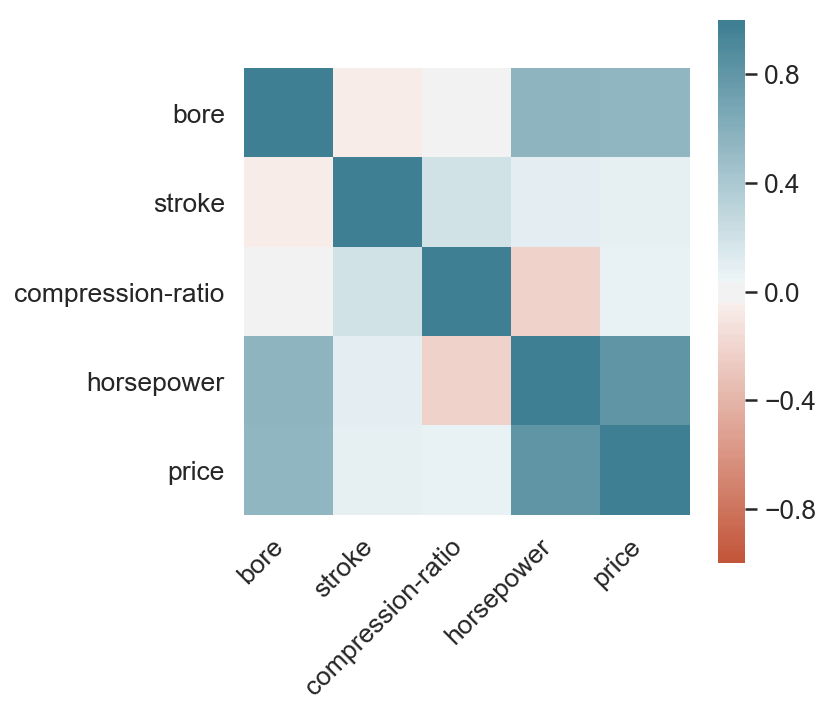

In [64]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap


data = pd.read_csv('https://gist.githubusercontent.com/dzaric/576b67eabb4c51b6bc18a6aa1edd0984/raw/a2f0f379a6e5b3a0dff687a84254b2ce9367c766/autos.clean.csv')

corr = data[['bore', 'stroke', 'compression-ratio', 'horsepower', 'price']].corr()
display(corr)
ax = sns.heatmap(
    corr, 
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')



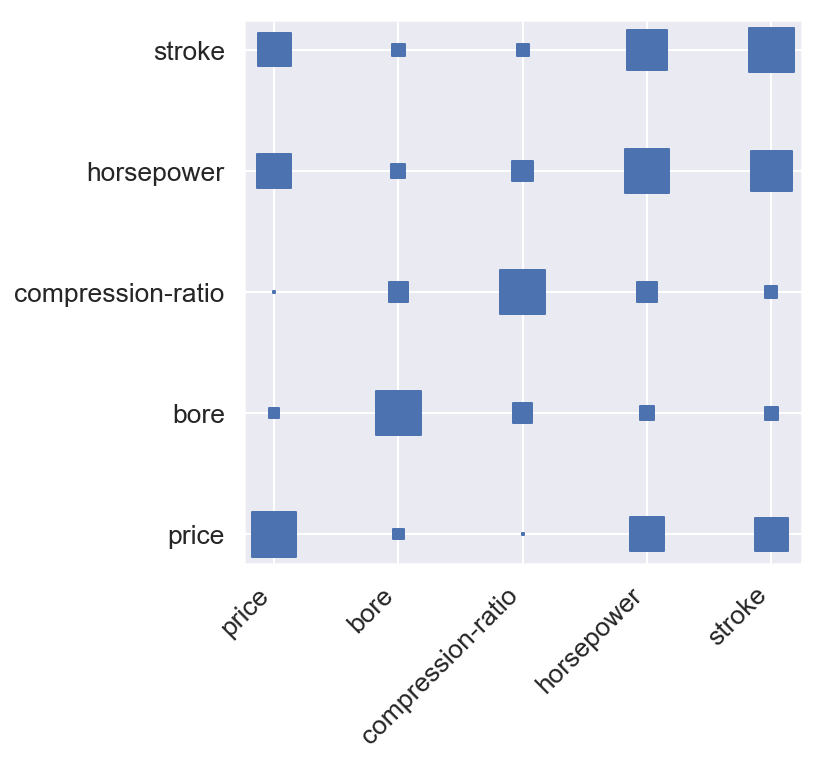

In [88]:
# Step 1 - Make a scatter plot with square markers, set column names as labels

columns = ['bore', 'stroke', 'compression-ratio', 'horsepower', 'price'] 
corr = data[columns].corr()
column_to_num = {p[1]:p[0] for p in enumerate(corr.columns)}
corr = pd.melt(corr.reset_index(), id_vars='index')
corr.columns = ['x', 'y', 'value']

fig, ax = plt.subplots()

ax.scatter(
    x=corr['x'].map(column_to_num),
    y=corr['y'].map(column_to_num),
    s=corr['value'].abs() * 500,
    marker='s'
)
ax.set_xticks([v for k,v in column_to_num.items()])
ax.set_xticklabels(columns, rotation=45, horizontalalignment='right')
ax.set_yticks([v for k,v in column_to_num.items()])
ax.set_yticklabels(columns)

/Users/drazenz/virtualenvs/jupyter/lib/python3.5/site-packages/matplotlib/collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


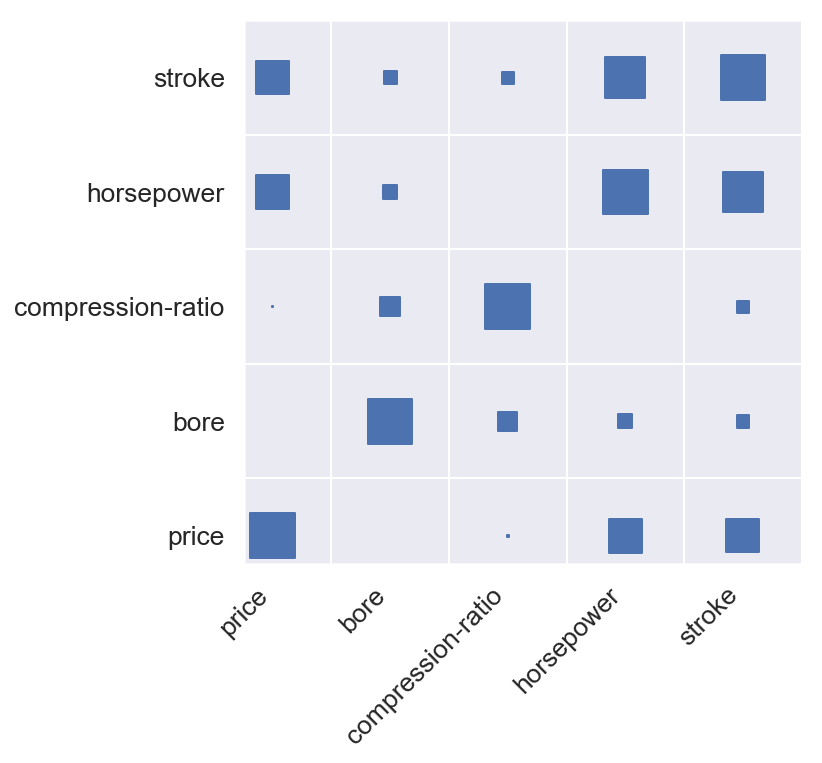

In [67]:
# Step 2 - Move the grid so we get our square markers in the center of cells of the background grid
columns = ['bore', 'stroke', 'compression-ratio', 'horsepower', 'price'] 
corr = data[columns].corr()
column_to_num = {p[1]:p[0] for p in enumerate(corr.columns)}
corr = pd.melt(corr.reset_index(), id_vars='index')
corr.columns = ['x', 'y', 'value']

fig, ax = plt.subplots()

ax.scatter(
    x=corr['x'].map(column_to_num),
    y=corr['y'].map(column_to_num),
    s=corr['value'].abs() * 500,
    marker='s'
)
ax.set_xticks([v for k,v in column_to_num.items()])
ax.set_xticklabels(columns, rotation=45, horizontalalignment='right')
ax.set_yticks([v for k,v in column_to_num.items()])
ax.set_yticklabels(columns)

ax.grid(False, 'major') # Turn off major gridlines
ax.grid(True, 'minor') # Turn on minor gridlines
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True) # Set gridlines to appear between integer coordinates
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True) # Do the same for y axisax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True) # Do the same for y axis

(-0.5, 4.5)

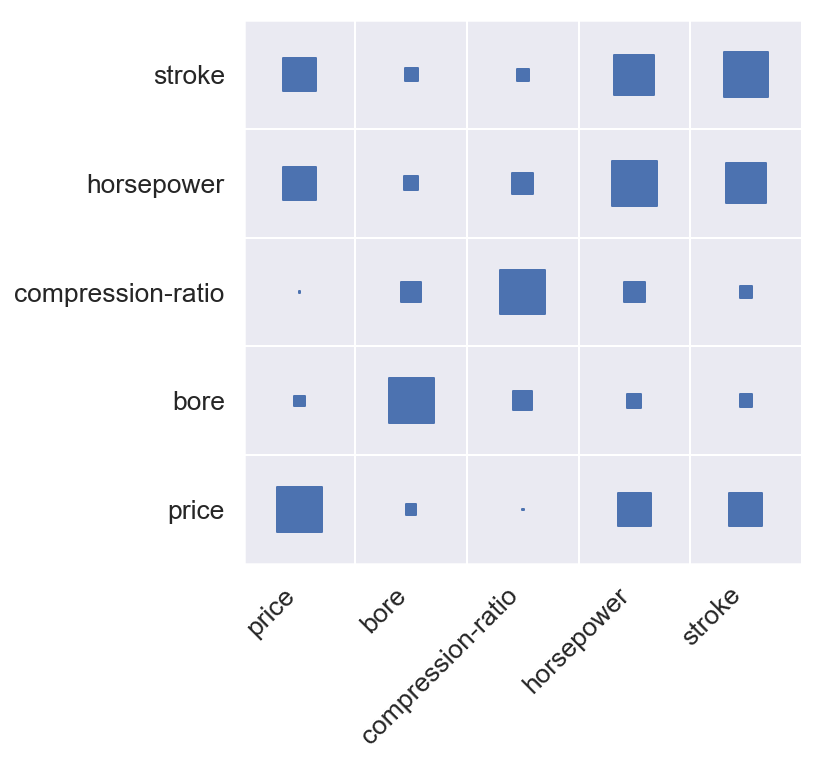

In [89]:
# Step 3 - Set axis limits so that lower and left side are not cropped

columns = ['bore', 'stroke', 'compression-ratio', 'horsepower', 'price'] 
corr = data[columns].corr()
column_to_num = {p[1]:p[0] for p in enumerate(corr.columns)}
corr = pd.melt(corr.reset_index(), id_vars='index')
corr.columns = ['x', 'y', 'value']

fig, ax = plt.subplots()

ax.scatter(
    x=corr['x'].map(column_to_num),
    y=corr['y'].map(column_to_num),
    s=corr['value'].abs() * 500,
    marker='s'
)
ax.set_xticks([v for k,v in column_to_num.items()])
ax.set_xticklabels(columns, rotation=45, horizontalalignment='right')
ax.set_yticks([v for k,v in column_to_num.items()])
ax.set_yticklabels(columns)

ax.grid(False, 'major') # Turn off major gridlines
ax.grid(True, 'minor') # Turn on minor gridlines
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True) # Set gridlines to appear between integer coordinates
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True) # Do the same for y axisax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True) # Do the same for y axis

ax.set_xlim([-0.5, max([v for v in column_to_num.values()]) + 0.5]) # 
ax.set_ylim([-0.5, max([v for v in column_to_num.values()]) + 0.5])

(-0.5, 5.5)

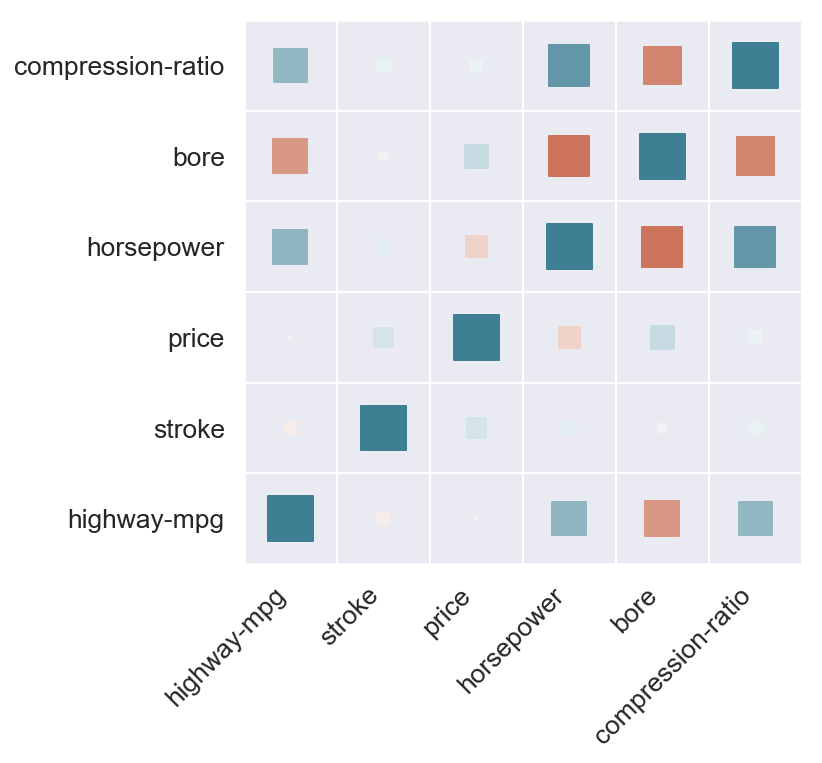

In [91]:
# Step 4 - Add color

columns = ['bore', 'stroke', 'compression-ratio', 'horsepower', 'highway-mpg', 'price'] 
corr = data[columns].corr()
column_to_num = {p[1]:p[0] for p in enumerate(corr.columns)}
corr = pd.melt(corr.reset_index(), id_vars='index')
corr.columns = ['x', 'y', 'value']

n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    color_range = color_max - color_min # length of the input range
    val_position = float((val - color_min)) / color_range # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

fig, ax = plt.subplots()

ax.scatter(
    x=corr['x'].map(column_to_num),
    y=corr['y'].map(column_to_num),
    s=corr['value'].abs() * 500,
    c=corr['value'].apply(value_to_color), # map value column to color palette and use it to color the markers
    marker='s'
)
ax.set_xticks([v for k,v in column_to_num.items()])
ax.set_xticklabels(columns, rotation=45, horizontalalignment='right')
ax.set_yticks([v for k,v in column_to_num.items()])
ax.set_yticklabels(columns)

ax.grid(False, 'major') # Turn off major gridlines
ax.grid(True, 'minor') # Turn on minor gridlines
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True) # Set gridlines to appear between integer coordinates
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True) # Do the same for y axisax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True) # Do the same for y axis

ax.set_xlim([-0.5, max([v for v in column_to_num.values()]) + 0.5]) # 
ax.set_ylim([-0.5, max([v for v in column_to_num.values()]) + 0.5])

(-0.5, 4.5)

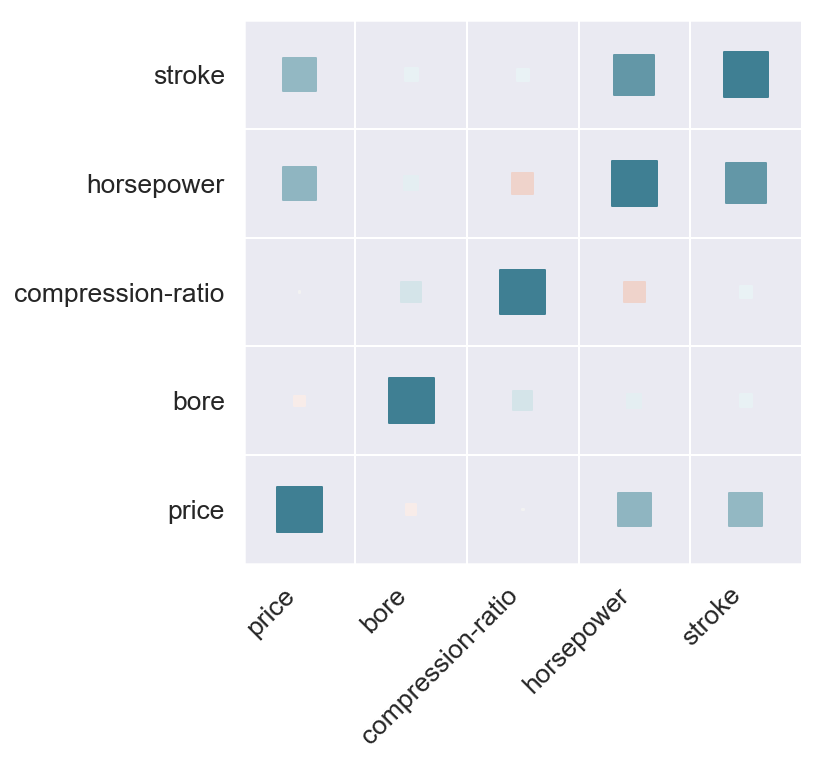

In [79]:
# Step 4 - Add color

columns = ['bore', 'stroke', 'compression-ratio', 'horsepower', 'highway-mpg', 'price'] 
corr = data[columns].corr()
column_to_num = {p[1]:p[0] for p in enumerate(corr.columns)}
corr = pd.melt(corr.reset_index(), id_vars='index')
corr.columns = ['x', 'y', 'value']

n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    color_range = color_max - color_min # length of the input range
    val_position = float((val - color_min)) / color_range # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

size_scale = 500

fig, ax = plt.subplots()

ax.scatter(
    x=corr['x'].map(column_to_num),
    y=corr['y'].map(column_to_num),
    marker='s',
    s=abs(corr['value']*size_scale),
    c=corr['value'].apply(value_to_color)
)
ax.set_xticks([v for k,v in column_to_num.items()])
ax.set_xticklabels(columns, rotation=45, horizontalalignment='right')
ax.set_yticks([v for k,v in column_to_num.items()])
ax.set_yticklabels(columns)

ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

ax.set_xlim([-0.5, max([v for v in column_to_num.values()]) + 0.5])
ax.set_ylim([-0.5, max([v for v in column_to_num.values()]) + 0.5])



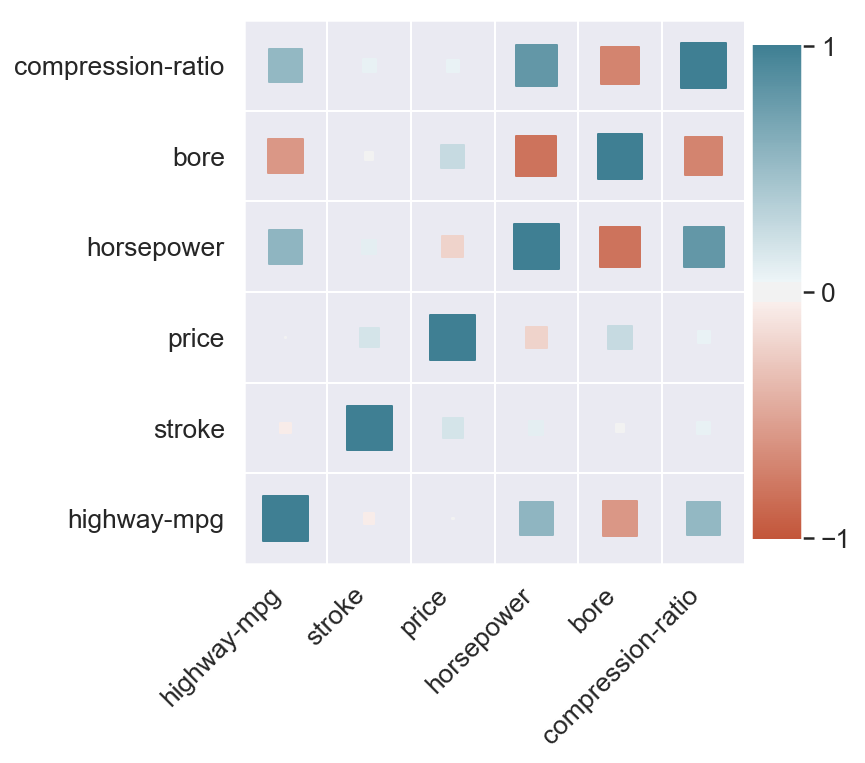

In [110]:
# Step 5 - Add color legend

columns = ['bore', 'stroke', 'compression-ratio', 'horsepower', 'highway-mpg', 'price'] 
corr = data[columns].corr()
column_to_num = {p[1]:p[0] for p in enumerate(corr.columns)}
corr = pd.melt(corr.reset_index(), id_vars='index')
corr.columns = ['x', 'y', 'value']

n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    color_range = color_max - color_min # length of the input range
    val_position = float((val - color_min)) / color_range # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

size_scale = 500

plot_grid = plt.GridSpec(1, 10, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
ax = plt.subplot(plot_grid[:,:-1]) # Use the left 9/10ths of the grid for the main plot

ax.scatter(
    x=corr['x'].map(column_to_num),
    y=corr['y'].map(column_to_num),
    marker='s',
    s=abs(corr['value']*size_scale),
    c=corr['value'].apply(value_to_color)
)
ax.set_xticks([v for k,v in column_to_num.items()])
ax.set_xticklabels(columns, rotation=45, horizontalalignment='right')
ax.set_yticks([v for k,v in column_to_num.items()])
ax.set_yticklabels(columns)

ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

ax.set_xlim([-0.5, max([v for v in column_to_num.values()]) + 0.5])
ax.set_ylim([-0.5, max([v for v in column_to_num.values()]) + 0.5])

# Add color legend to the upper rightmost field in the grid
ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost 1/10th of the plot
col_x = [0]*len(palette) # Fixed x coordinate for the bars
y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars
bar_height = y[1] - y[0]
ax.barh(bottom=y, width=[5]*len(palette), left=col_x, height=bar_height, color=palette, linewidth=0)
ax.set_xlim(1, 2)
ax.grid(False)
ax.set_facecolor('w')
ax.set_xticks([])
ax.set_yticks(np.linspace(min(y), max(y), 3))
ax.yaxis.tick_right()


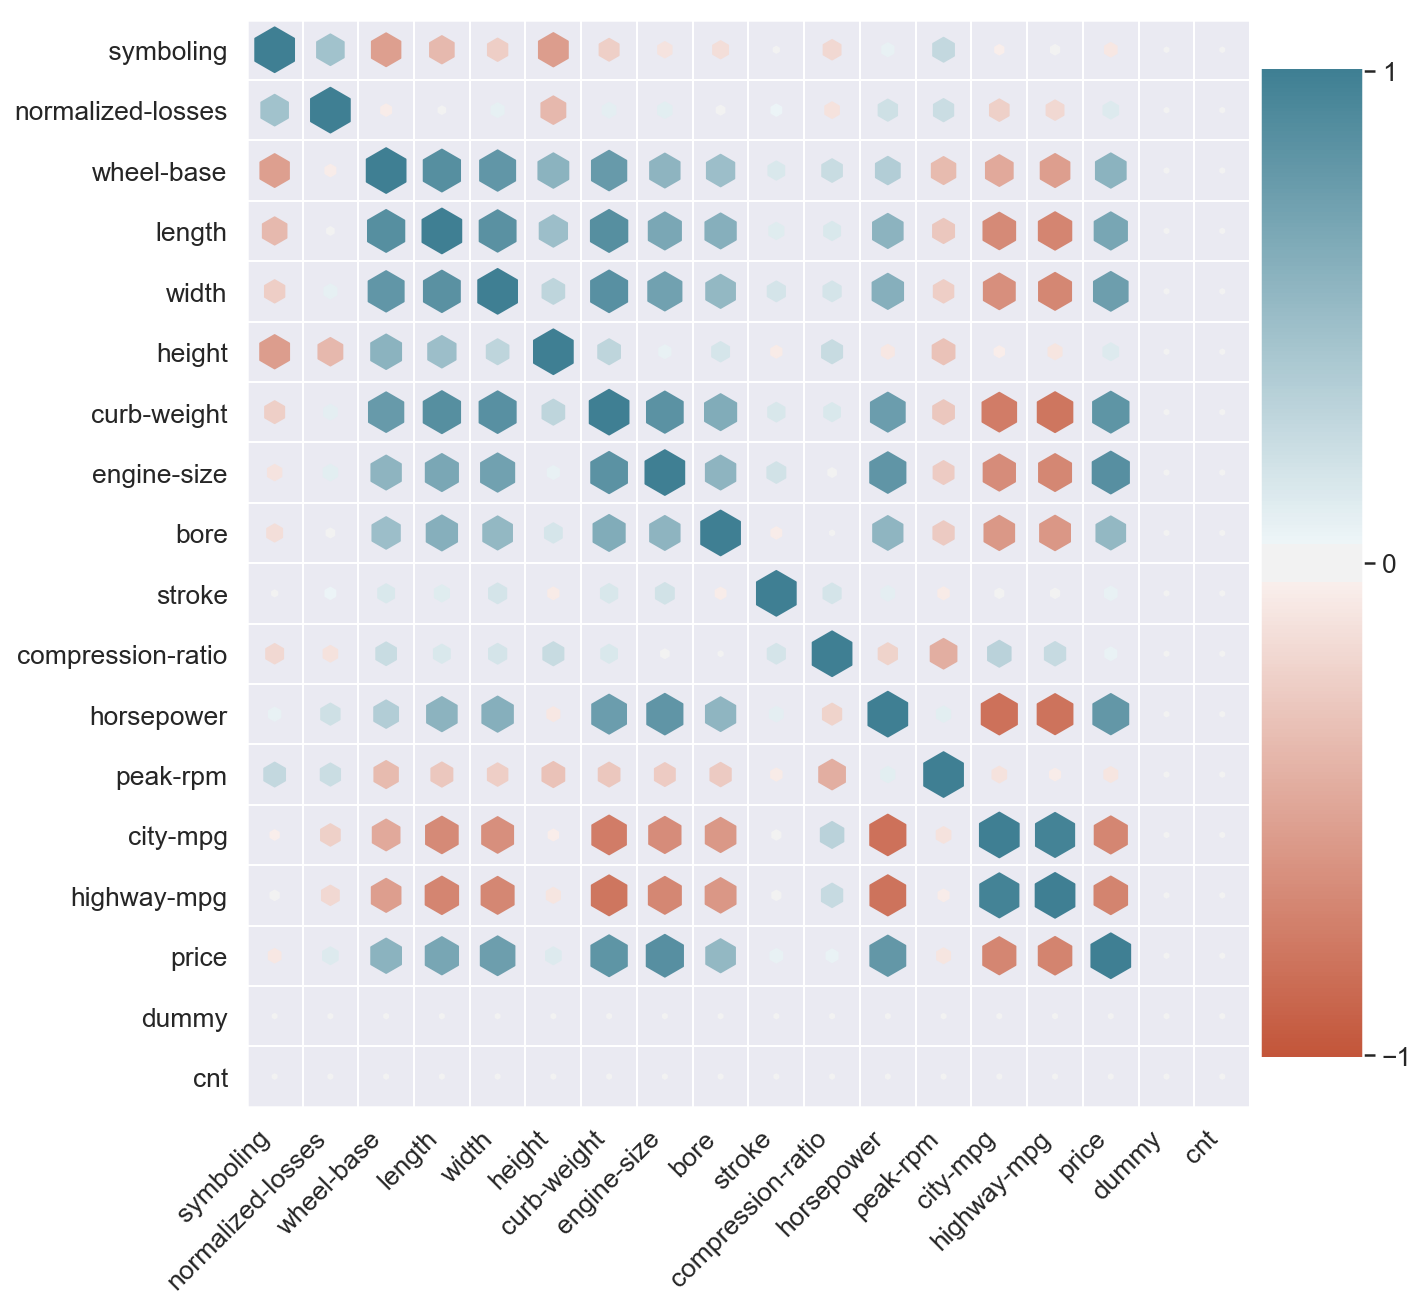

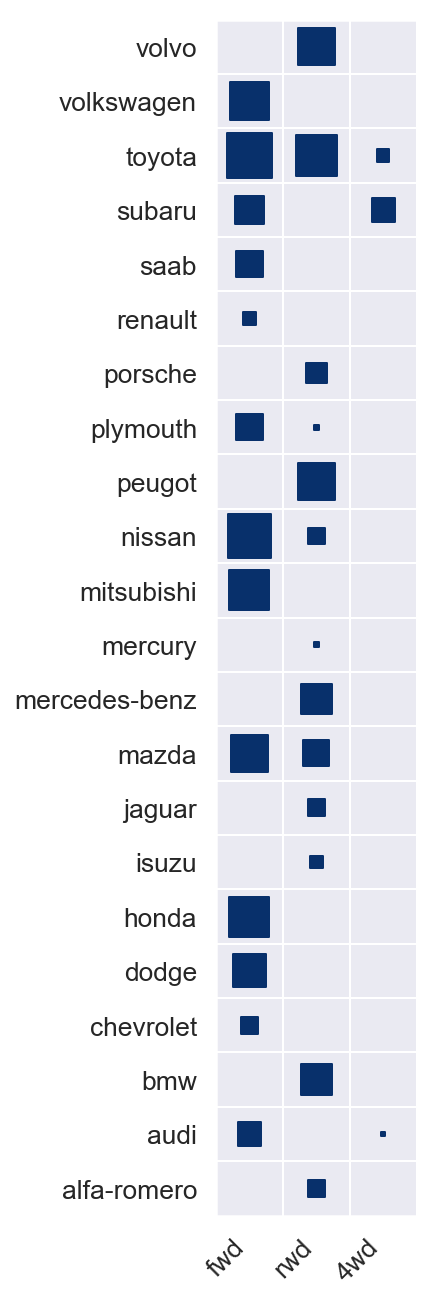

In [315]:
# Step 6 - Make it a function and parametrize size and color properties

def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)
        
    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 
        
    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            color_range = color_max - color_min # length of the input range
            val_position = float((val - color_min)) / color_range # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]
    
    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)
    
    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)
        
    size_scale = kwargs.get('size_scale', 500)
    
    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            size_range = size_max - size_min # length of the input range
            val_position = (val - size_min) * 0.99 / (size_range) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}
    
    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}
    
    plot_grid = plt.GridSpec(1, 10, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 9/10ths of the grid for the main plot
        
    marker = kwargs.get('marker', 's')
    
    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}
    
    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    
    if color_min < color_max:
        # Add color legend to the upper rightmost field in the grid
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost 1/10th of the plot
        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars
        bar_height = y[1] - y[0]
        ax.barh(bottom=y, width=[5]*len(palette), left=col_x, height=bar_height, color=palette, linewidth=0)
        ax.set_xlim(1, 2)
        ax.grid(False)
        ax.set_facecolor('w')
        ax.set_xticks([])
        ax.set_yticks(np.linspace(min(y), max(y), 3))
        ax.yaxis.tick_right()
   

def corrplot(data):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=n_colors),
        size=corr['value'].abs(), size_range=[0,1],
        marker='h',
        x_order=data.columns,
        y_order=data.columns[::-1]
    )

columns = ['bore', 'stroke', 'compression-ratio', 'horsepower', 'highway-mpg', 'price'] 
corrplot(data.corr().replace(np.nan, 0))
plt.figure()

# display(data.columns)
# data['cnt'] = np.ones(len(data))
g = data.groupby(['make', 'drive-wheels']).count()[['cnt']].reset_index()
plt.figure(figsize=(2, 11))
heatmap(y=g['make'], x=g['drive-wheels'], size=g['cnt'], size_scale=500, x_order=['fwd', 'rwd', '4wd'])


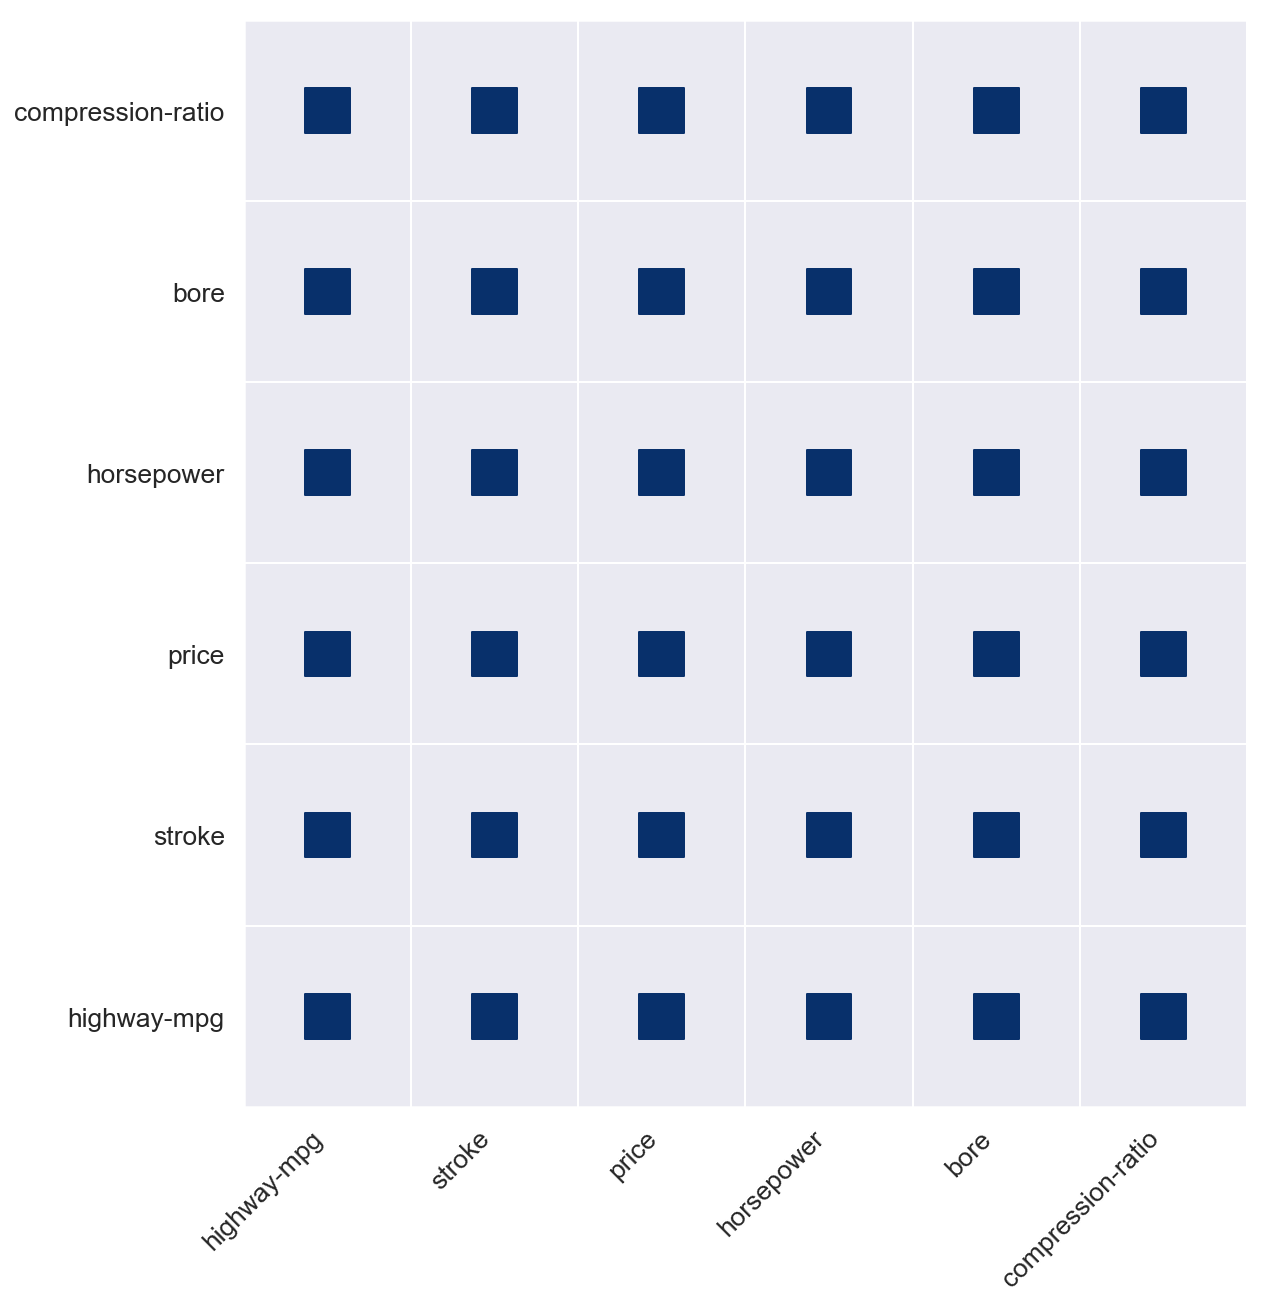

In [196]:
# Step 6 - Make it a function and parametrize it


def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)
        
    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 
        
    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            color_range = color_max - color_min # length of the input range
            val_position = float((val - color_min)) / color_range # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]
    
    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)
    
    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)
        
    size_scale = kwargs.get('size_scale', 500)
    
    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            size_range = size_max - size_min # length of the input range
            val_position = float((val - size_min)) / size_range # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale

    plot_grid = plt.GridSpec(1, 10, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 9/10ths of the grid for the main plot
        
    marker = kwargs.get('marker', 's')
    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker'
    ]}
    ax.scatter(
        x=corr['x'].map(column_to_num),
        y=corr['y'].map(column_to_num),
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in column_to_num.items()])
    ax.set_xticklabels(columns, rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in column_to_num.items()])
    ax.set_yticklabels(columns)

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in column_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in column_to_num.values()]) + 0.5])
    
    if color_min < color_max:
        # Add color legend to the upper rightmost field in the grid
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost 1/10th of the plot
        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars
        bar_height = y[1] - y[0]
        ax.barh(bottom=y, width=[5]*len(palette), left=col_x, height=bar_height, color=palette, linewidth=0)
        ax.set_xlim(1, 2)
        ax.grid(False)
        ax.set_facecolor('w')
        ax.set_xticks([])
        ax.set_yticks(np.linspace(min(y), max(y), 3))
        ax.yaxis.tick_right()
    
columns = ['bore', 'stroke', 'compression-ratio', 'horsepower', 'highway-mpg', 'price'] 
corr = data[columns].corr()
column_to_num = {p[1]:p[0] for p in enumerate(corr.columns)}
corr = pd.melt(corr.reset_index(), id_vars='index')
corr.columns = ['x', 'y', 'value']
heatmap(
    corr['x'],
    corr['y'], 
#     color=corr['value'], 
#     color_range=[-1, 1],
#     palette=sns.diverging_palette(20, 220, n=n_colors),
#     size=corr['value'].abs(), size_scale=5000, size_range=[0,1],
#     marker='s'
)